In [5]:
import pandas as pd
data=pd.read_excel("C:\\Users\\User\\Downloads\\IMDB Dataset_sample.xlsx")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
1109,I have not read the book that this was based u...,positive
1110,"Brilliant thriller, deserving far more fame, M...",positive
1111,I saw this movie a fews years ago and was lite...,positive
1112,I just watched this movie on Bravo! and it was...,negative


In [8]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [15]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

eng_stop_words=stopwords.words('English')

In [10]:
data.values[0]

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

sentiment
positive    558
negative    556
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

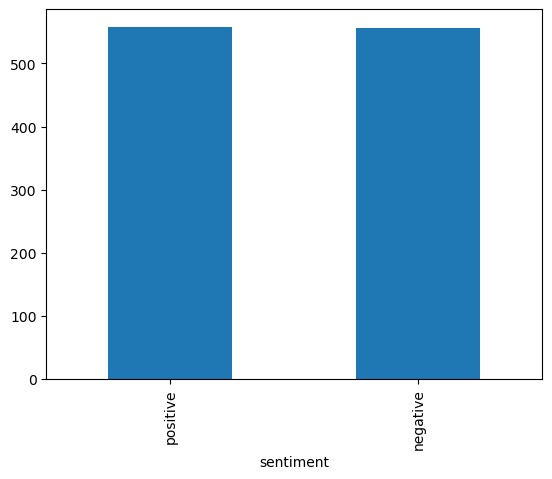

In [11]:
print(data.value_counts('sentiment'))
data.value_counts('sentiment').plot(kind='bar')

In [12]:
map_dict={'positive':1,
         'negative':0}
data['sentiment_numeric']=data.sentiment.map(map_dict)
data.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [16]:
ps=PorterStemmer()
corpus=set()

def preprocess(text):
    ##removing unwanted space
    text=text.strip()
    ##removing html tags
    text=re.sub("<[^>]*>","",text)
    ##removing any numerical values
    text=re.sub('[^a-zA-Z]',' ',text)
    ##lower case the word
    text=text.lower()
    text=text.split()
    text=[w for w in text if not w in eng_stop_words]
    ##stemming the word for sentiment analysis do not remove the stop words
    text=[ps.stem(word) for word in text]
    text=' '.join(text)
    return text

In [17]:
data['preprocessed_review']=data.review.apply(preprocess)
data.head()

,review,sentiment,sentiment_numeric,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...


In [72]:
tf_idf=TfidfVectorizer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.preprocessed_review,
                                                 data.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=data.sentiment_numeric)
X_train_tf=tf_idf.fit_transform(X_train)
X_train_tf

<891x11806 sparse matrix of type '<class 'numpy.float64'>'
	with 83678 stored elements in Compressed Sparse Row format>

In [73]:
X_test_tf=tf_idf.transform(X_test)
X_test_tf

<223x11806 sparse matrix of type '<class 'numpy.float64'>'
	with 18513 stored elements in Compressed Sparse Row format>

In [74]:
naive_bayes_classifer=MultinomialNB()
naive_bayes_classifer.fit(X_train_tf,y_train)

MultinomialNB()

In [75]:
y_pred=naive_bayes_classifer.predict(X_test_tf)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [76]:
print(metrics.classification_report(y_test,y_pred,target_names=['Positive','Negtive']))

              precision    recall  f1-score   support

    Positive       0.77      0.88      0.82       111
     Negtive       0.86      0.74      0.80       112

    accuracy                           0.81       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.81      0.81       223



In [77]:
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:
[[98 13]
 [29 83]]
